# Capstone Project

## Inisiasi

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

## Load Data

In [ ]:
df = pd.read_csv('/content/modified_sugar_classification_dataset.csv')
df.head(3)

,Berat_Badan,Umur,Gula_Harian,Gula_Tinggi,Tingkat Aktivitas Harian,Jenis Kelamin,Riwayat Diabetes
0,46,36,20,1,sedang,perempuan,iya
1,55,46,57,0,tinggi,laki-laki,iya
2,52,25,38,0,tinggi,laki-laki,tidak


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Berat_Badan               1000 non-null   int64 
 1   Umur                      1000 non-null   int64 
 2   Gula_Harian               1000 non-null   int64 
 3   Gula_Tinggi               1000 non-null   int64 
 4   Tingkat Aktivitas Harian  1000 non-null   object
 5   Jenis Kelamin             1000 non-null   object
 6   Riwayat Diabetes          1000 non-null   object
dtypes: int64(4), object(3)
memory usage: 54.8+ KB


## Data Transformation

In [ ]:
print('Tingkat Aktivitas Harian: ',df['Tingkat Aktivitas Harian'].unique())
print('Jenis Kelamin : ',df['Jenis Kelamin'].unique())
print('Riwayat Diabetes : ',df['Riwayat Diabetes'].unique())

Tingkat Aktivitas Harian:  ['sedang' 'tinggi' 'rendah']
Jenis Kelamin :  ['perempuan' 'laki-laki']
Riwayat Diabetes :  ['iya' 'tidak']


Feature *Umur* dan *Berat_Badan* diubah dari yang numerikal menjadi kategorikal dengan mengelompokkan umur ke dalam rentang tertentu

In [ ]:
df['Umur'] = pd.cut(df['Umur'],[10,20,60,80],labels=['remaja','dewasa','lansia'])

In [ ]:
df.describe()

,Berat_Badan,Gula_Harian,Gula_Tinggi
count,1000.000000,1000.000000,1000.000000
mean,70.348000,56.135000,0.404000
std,17.609401,25.805245,0.490943
min,40.000000,10.000000,0.000000
25%,55.000000,34.000000,0.000000
50%,70.000000,56.500000,0.000000
75%,86.000000,78.000000,1.000000
max,100.000000,100.000000,1.000000


In [ ]:
df['Berat_Badan'] = pd.cut(df['Berat_Badan'],[40,60,80,100])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Berat_Badan               985 non-null    category
 1   Umur                      1000 non-null   category
 2   Gula_Harian               1000 non-null   int64   
 3   Gula_Tinggi               1000 non-null   int64   
 4   Tingkat Aktivitas Harian  1000 non-null   object  
 5   Jenis Kelamin             1000 non-null   object  
 6   Riwayat Diabetes          1000 non-null   object  
dtypes: category(2), int64(2), object(3)
memory usage: 41.4+ KB


Blok dibawah hanya ingin memeriksa persebaran data. Mungkin dengan membuat pengelompokan berbeda bisa memengaruhi model (?)

In [ ]:
df.groupby('Umur').count()

<ipython-input-57-96683dbff93c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Umur').count()


,Berat_Badan,Gula_Harian,Gula_Tinggi,Tingkat Aktivitas Harian,Jenis Kelamin,Riwayat Diabetes
Umur,,,,,,
remaja,49,49,49,49,49,49
dewasa,837,851,851,851,851,851
lansia,99,100,100,100,100,100


In [ ]:
df.groupby('Berat_Badan').count()

<ipython-input-58-43ba5a507a8a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Berat_Badan').count()


,Umur,Gula_Harian,Gula_Tinggi,Tingkat Aktivitas Harian,Jenis Kelamin,Riwayat Diabetes
Berat_Badan,,,,,,
"(40, 60]",335,335,335,335,335,335
"(60, 80]",313,313,313,313,313,313
"(80, 100]",337,337,337,337,337,337


Melakukan proses one hot encoding pada feature kategorikal

In [ ]:
df = pd.get_dummies(df,columns=['Tingkat Aktivitas Harian','Umur','Berat_Badan'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Gula_Harian                      1000 non-null   int64 
 1   Gula_Tinggi                      1000 non-null   int64 
 2   Jenis Kelamin                    1000 non-null   object
 3   Riwayat Diabetes                 1000 non-null   object
 4   Tingkat Aktivitas Harian_rendah  1000 non-null   bool  
 5   Tingkat Aktivitas Harian_sedang  1000 non-null   bool  
 6   Tingkat Aktivitas Harian_tinggi  1000 non-null   bool  
 7   Umur_remaja                      1000 non-null   bool  
 8   Umur_dewasa                      1000 non-null   bool  
 9   Umur_lansia                      1000 non-null   bool  
 10  Berat_Badan_(40, 60]             1000 non-null   bool  
 11  Berat_Badan_(60, 80]             1000 non-null   bool  
 12  Berat_Badan_(80, 100]            10

Mengubah nilai feature *Jenis Kelamin* dan *Riwayat Diabetes* menjadi 0 atau 1

In [ ]:
df['Jenis Kelamin'] = df['Jenis Kelamin'].map({'laki-laki':1,'perempuan':0})
df['Riwayat Diabetes'] = df['Riwayat Diabetes'].map({'iya':1,'tidak':0})

In [ ]:
df.head(3)

,Gula_Harian,Gula_Tinggi,Jenis Kelamin,Riwayat Diabetes,Tingkat Aktivitas Harian_rendah,Tingkat Aktivitas Harian_sedang,Tingkat Aktivitas Harian_tinggi,Umur_remaja,Umur_dewasa,Umur_lansia,"Berat_Badan_(40, 60]","Berat_Badan_(60, 80]","Berat_Badan_(80, 100]"
0,20,1,0,1,False,True,False,False,True,False,True,False,False
1,57,0,1,1,False,False,True,False,True,False,True,False,False
2,38,0,1,0,False,False,True,False,True,False,True,False,False


In [ ]:
df = df.astype('int32')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Gula_Harian                      1000 non-null   int32
 1   Gula_Tinggi                      1000 non-null   int32
 2   Jenis Kelamin                    1000 non-null   int32
 3   Riwayat Diabetes                 1000 non-null   int32
 4   Tingkat Aktivitas Harian_rendah  1000 non-null   int32
 5   Tingkat Aktivitas Harian_sedang  1000 non-null   int32
 6   Tingkat Aktivitas Harian_tinggi  1000 non-null   int32
 7   Umur_remaja                      1000 non-null   int32
 8   Umur_dewasa                      1000 non-null   int32
 9   Umur_lansia                      1000 non-null   int32
 10  Berat_Badan_(40, 60]             1000 non-null   int32
 11  Berat_Badan_(60, 80]             1000 non-null   int32
 12  Berat_Badan_(80, 100]            1000 non-null   

In [ ]:
df.describe()

,Gula_Harian,Gula_Tinggi,Jenis Kelamin,Riwayat Diabetes,Tingkat Aktivitas Harian_rendah,Tingkat Aktivitas Harian_sedang,Tingkat Aktivitas Harian_tinggi,Umur_remaja,Umur_dewasa,Umur_lansia,"Berat_Badan_(40, 60]","Berat_Badan_(60, 80]","Berat_Badan_(80, 100]"
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,56.135000,0.404000,0.516000,0.39800,0.319000,0.393000,0.288000,0.049000,0.851000,0.10000,0.335000,0.313000,0.337000
std,25.805245,0.490943,0.499994,0.48973,0.466322,0.488661,0.453058,0.215976,0.356267,0.30015,0.472227,0.463946,0.472921
min,10.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,34.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000
50%,56.500000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000
75%,78.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000,1.000000,0.00000,1.000000,1.000000,1.000000
max,100.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


Melakukan scaling nilai pada feature 'Gula_Harian' menggunakan standard scaler.

Next mungkin bisa dicoba menggunakan scaling lain (?)

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Gula_Harian']])

In [ ]:
df['Gula_Harian'] = scaled_data

In [ ]:
df.describe()

,Gula_Harian,Gula_Tinggi,Jenis Kelamin,Riwayat Diabetes,Tingkat Aktivitas Harian_rendah,Tingkat Aktivitas Harian_sedang,Tingkat Aktivitas Harian_tinggi,Umur_remaja,Umur_dewasa,Umur_lansia,"Berat_Badan_(40, 60]","Berat_Badan_(60, 80]","Berat_Badan_(80, 100]"
count,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,7.638334e-17,0.404000,0.516000,0.39800,0.319000,0.393000,0.288000,0.049000,0.851000,0.10000,0.335000,0.313000,0.337000
std,1.000500e+00,0.490943,0.499994,0.48973,0.466322,0.488661,0.453058,0.215976,0.356267,0.30015,0.472227,0.463946,0.472921
min,-1.788709e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,-8.582006e-01,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000
50%,1.415149e-02,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000
75%,8.477323e-01,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000,1.000000,0.00000,1.000000,1.000000,1.000000
max,1.700699e+00,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


## Post Transformation

Pembuatan dataset 75% training dan 25% test.

In [ ]:
target_np = df.pop('Gula_Tinggi').values
dataset_np = df.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset_np, target_np, test_size=0.25)

In [ ]:
y_test = np.reshape(y_test,(y_test.shape[0],1))
y_train = np.reshape(y_train,(y_train.shape[0],1))

In [ ]:
NUM_FEATURES = X_train.shape[1]
NUM_TRAIN_DATA = X_train.shape[0]
NUM_TEST_DATA = X_test.shape[0]

In [ ]:
print('Jumlah Feature: {}\nJumlah Train Dataset: {}\nJumlah Test Dataset: {}'.format(NUM_FEATURES,NUM_TRAIN_DATA,NUM_TEST_DATA))

Jumlah Feature: 12
Jumlah Train Dataset: 750
Jumlah Test Dataset: 250


## Pembuatan Model

In [ ]:
from tensorflow.keras import regularizers

model_1= tf.keras.models.Sequential([
    tf.keras.Input(shape=(NUM_FEATURES,)),
    tf.keras.layers.Dense(64, activation='relu',
                          kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
y_pred = (model_1.predict(X_test) > 0.3).astype(int)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [ ]:
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_1.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(0.001),metrics=['accuracy'])

## Training the Model

In [ ]:
history_model1 = model_1.fit(X_train,y_train,batch_size=16,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5549 - loss: 0.8799 - val_accuracy: 0.6080 - val_loss: 0.8222
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5947 - loss: 0.8324 - val_accuracy: 0.6080 - val_loss: 0.7892
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5669 - loss: 0.7995 - val_accuracy: 0.6080 - val_loss: 0.7639
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5853 - loss: 0.7698 - val_accuracy: 0.6080 - val_loss: 0.7457
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6187 - loss: 0.7331 - val_accuracy: 0.6080 - val_loss: 0.7314
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6139 - loss: 0.7224 - val_accuracy: 0.6080 - val_loss: 0.7198
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5886 - loss: 0.7242 - val_accuracy: 0.6080 - val_loss: 0.7106
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6104 - loss: 0.7046 - val_accuracy: 0.6080 - 

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

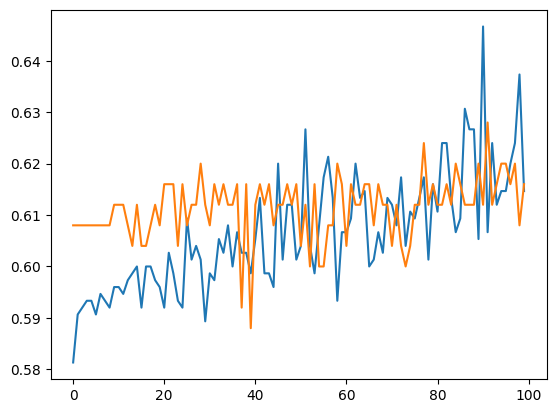

In [ ]:
plt.plot(np.arange(len(history_model1.history['accuracy'])),history_model1.history['accuracy'])
plt.plot(np.arange(len(history_model1.history['val_accuracy'])),history_model1.history['val_accuracy'])
plt.show()

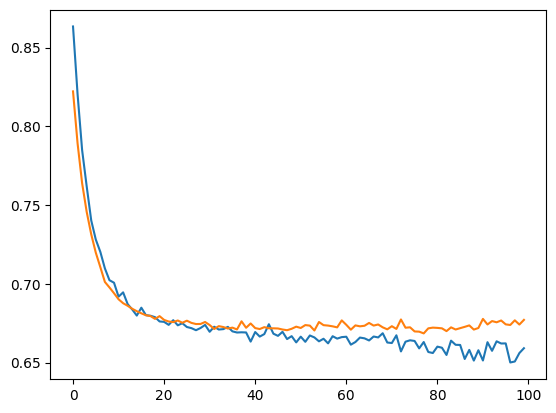

In [ ]:
plt.plot(np.arange(len(history_model1.history['loss'])),history_model1.history['loss'])
plt.plot(np.arange(len(history_model1.history['val_loss'])),history_model1.history['val_loss'])
plt.show()